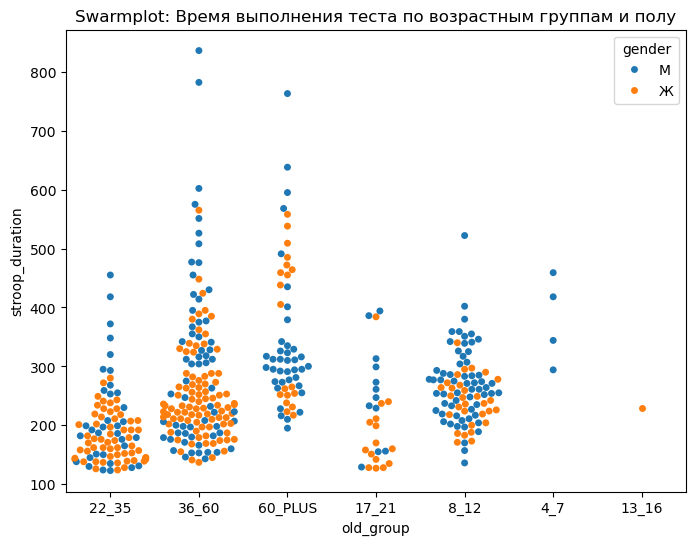

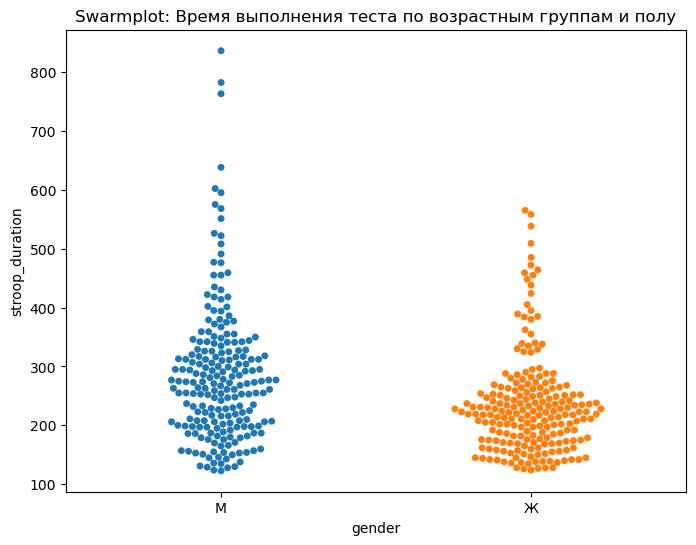

                            OLS Regression Results                            
Dep. Variable:        stroop_duration   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     17.99
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           7.21e-21
Time:                        01:23:16   Log-Likelihood:                -2492.0
No. Observations:                 419   AIC:                             5000.
Df Residuals:                     411   BIC:                             5032.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              230.0000 

In [9]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
import starbars
from scipy.stats import mannwhitneyu 
import statsmodels.formula.api as smf
import statsmodels.api as sm

wr.filterwarnings('ignore')

# Loading and reading dataset
df = pd.read_excel("dataset_mental_report_new.xlsx")
df.drop(["Unnamed: 0"], axis=1, inplace=True)  # Deleted first column

list = ['old_group', 'gender']
for var in list:
    plt.figure(figsize = (8, 6))
    sns.swarmplot(x =var, y ='stroop_duration', hue ='gender', data = df)
    plt.title("Swarmplot: Время выполнения теста по возрастным группам и полу")
    plt.show()

# Модель зависимости времени выполнения теста от возрастной группы и пола
model = smf.ols(formula='stroop_duration ~ old_group + gender', data=df)
res = model.fit()
print(res.summary())

In [10]:
# Создание копии DataFrame с интересующими контекстами
filtered_df = df[df['context'].isin(['COVID', 'Autism', 'Exoskelet', 'Реабилитация'])]

# Модель зависимости времени выполнения теста от возрастной группы, пола и контекста
model2 = smf.ols(formula='stroop_duration ~ old_group + gender + context', data=filtered_df)
result = model2.fit()
print(result.summary())

# В обеих моделях использован метод наименьших квадратов, 62.2% дисперсии времени выполнения теста объясняется вариацией \
# признаков: возрастной группой, полом и контекстом
# 60.2% со штрафом за количество признаков

                            OLS Regression Results                            
Dep. Variable:        stroop_duration   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     31.63
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           6.30e-29
Time:                        01:23:16   Log-Likelihood:                -868.26
No. Observations:                 163   AIC:                             1755.
Df Residuals:                     154   BIC:                             1782.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 